In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv",index_col="id")

In [3]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [39]:
from sklearn_extra.cluster import KMediods
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'sklearn_extra'

<AxesSubplot:>

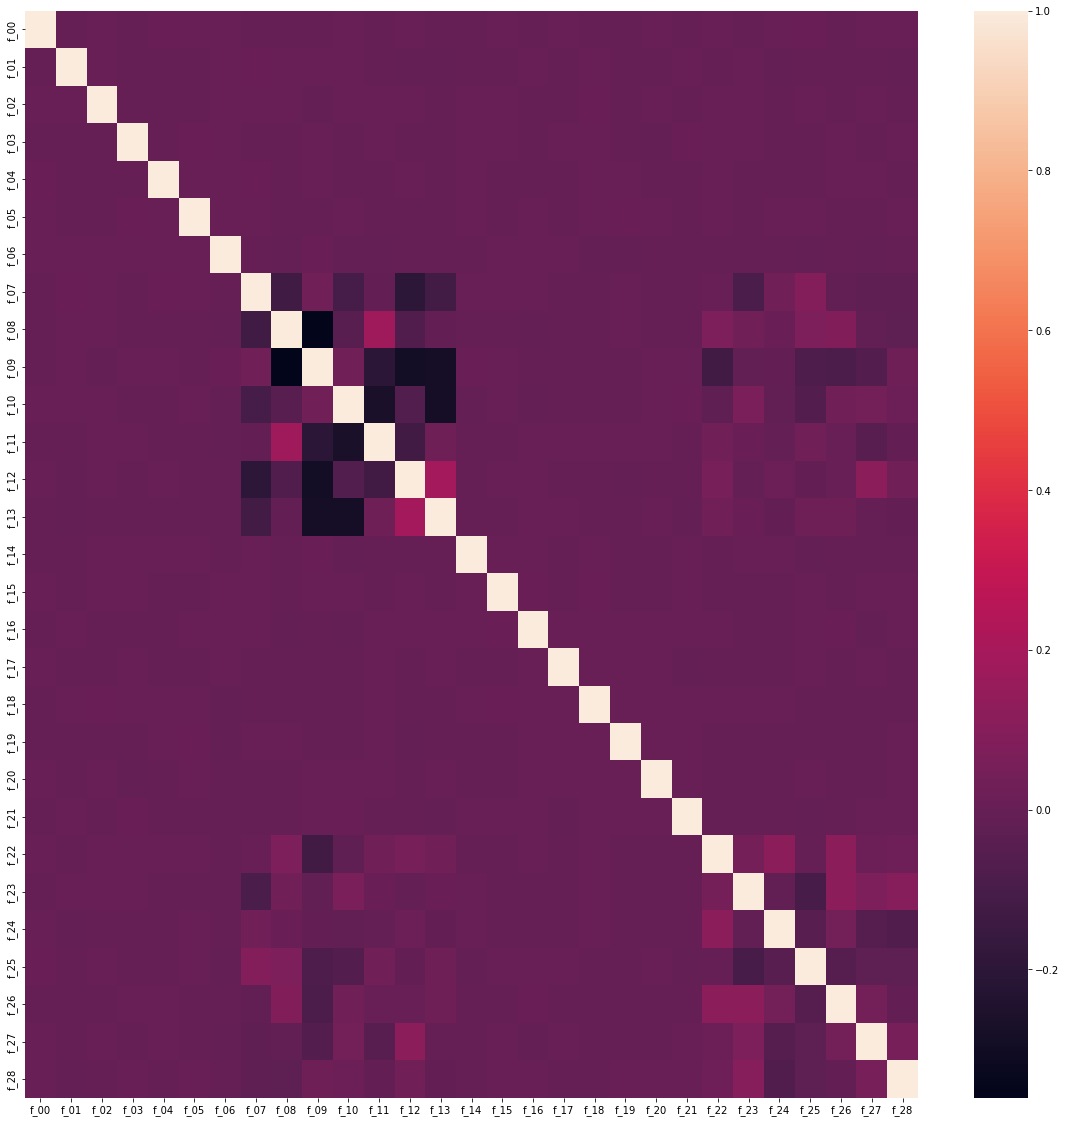

In [6]:
correl = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correl)

In [11]:
silhouette_avg = []
for i in range(2,18):
    # initalize kmeans
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    print(cluster_labels)
    
    #silhouette score
    silhouette_avg.append(silhouette_score(df,cluster_labels))

    

[1 1 1 ... 0 0 1]
[2 0 2 ... 2 0 0]
[3 1 3 ... 3 2 2]
[0 2 0 ... 1 4 0]
[3 4 3 ... 1 0 4]
[5 0 5 ... 1 1 0]
[1 3 1 ... 0 0 3]
[8 7 8 ... 4 4 7]
[5 6 5 ... 3 3 6]
[9 1 9 ... 8 8 1]
[0 7 0 ... 8 8 3]
[2 7 6 ... 4 4 7]
[7 8 3 ... 0 0 8]
[ 0  5 12 ...  4 10  5]
[ 8  7  6 ...  2  5 12]
[13 14  9 ...  0  2  8]


Text(0.5, 1.0, 'Sil')

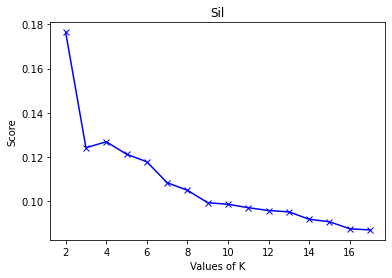

In [12]:
plt.plot(range(2,18),silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Score')
plt.title('Sil')

In [14]:
silhouette_avg

[0.17642088101307282,
 0.12415450348295316,
 0.12688051751909898,
 0.12124934737711314,
 0.1178262221567238,
 0.10834897507438393,
 0.10493714216225004,
 0.09929797674725531,
 0.09859318532543877,
 0.09704163070502217,
 0.09577511236129053,
 0.09515453637882389,
 0.091812059402437,
 0.09068794957656007,
 0.087507041807401,
 0.08699182814560631]

In [33]:
kmeans_opt = KMeans(n_clusters=2,random_state=0)
kmeans_opt.fit(df)
y = kmeans_opt.predict(df)

In [34]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [35]:
df_result = pd.DataFrame(columns=["Predicted"])

In [36]:
df_result['Predicted']=y
df_result.reset_index(inplace=True)
df_result.rename(columns={"index":"id"},inplace=True)

In [37]:
df_result

,id,Predicted
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
97995,97995,1
97996,97996,1
97997,97997,0
97998,97998,0


In [38]:
df_result.to_csv("out3.csv",index=False)
